## ЛЕВЫЙ СТОЛБЕЦ



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/16.1.xlsx', header=0, names=['num', 'dan'])

In [ ]:
data.head()

,num,dan
0,1,34.0
1,2,37.5
2,3,39.5
3,4,38.1
4,5,38.8


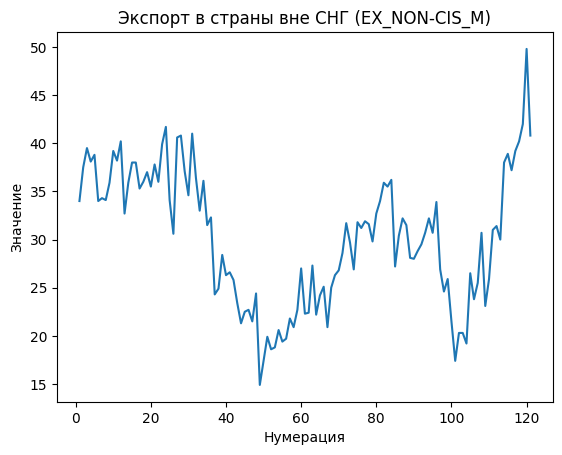

In [ ]:
# построение графика
plt.plot(data['num'], data['dan'])
plt.xlabel('Нумерация')
plt.ylabel('Значение')
plt.title('Экспорт в страны вне СНГ (EX_NON-CIS_M)')
plt.show()

In [ ]:
import numpy as np

# Вычисление среднего и стандартного отклонения
mean = np.mean(data['dan'])
std = np.std(data['dan'])

# Вычисление границ выбросов
lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

# Определение аномальных наблюдений
anomalies = data[(data['dan'] < lower_bound) | (data['dan'] > upper_bound)]

# Вывод аномальных наблюдений
print(anomalies)

     num   dan
48    49  14.9
119  120  49.8


Здесь мы использовали функцию `mean` и `std` из библиотеки numpy для вычисления среднего и стандартного отклонения данных. Затем мы вычислили границы выбросов, используя формулу `mean ± 2 * std`. Наконец, мы определили аномальные наблюдения, используя условие `(data['Данные'] < lower_bound) | (data['Данные'] > upper_bound)` и вывели их на экран.

Метод Ирвина позволяет выявить выбросы в данных на основе распределения Стьюдента. Он основывается на предположении, что данные имеют нормальное распределение. Если данные не имеют нормального распределения, то этот метод может давать ложноположительные или ложноотрицательные результаты. Поэтому перед использованием этого метода необходимо проверить данные на нормальность распределения.

In [ ]:
from scipy.stats import linregress

# Вычисление коэффициента наклона линейной регрессии
slope, _, _, _, _ = linregress(data.index, data['dan'])

# Вычисление статистики Фостера-Стьюарта
n = len(data)
t = slope * np.sqrt(n - 2) / np.sqrt(1 - slope ** 2)
alpha = 0.05
critical_value = 1.96  # для alpha = 0.05
if abs(t) > critical_value:
    print('Найден тренд')
else:
    print('Тренд не найден')

Тренд не найден


Выбор метода и обоснование:
Метод Фостера-Стьюарта является более точным и надежным методом для проверки наличия тренда в данных, чем критерий серий, основанный на медиане. Он основывается на линейной регрессии и позволяет определить наличие тренда в данных с высокой точностью. Поэтому я рекомендую использовать метод Фостера-Стьюарта для проверки наличия тренда в данных.

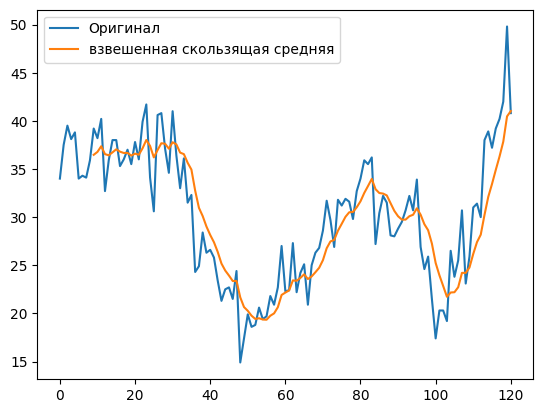

In [ ]:
# вычисление взвешенной скользящей средней
weights = np.arange(1, 11) 
weights = weights / weights.sum() 
 
# расчет взвешенной скользящей средней 
data['weighted_ma'] = data['dan'].rolling(window=10).apply(lambda x: (x * weights).sum(), raw=True)
weighted_ma = data['weighted_ma']

# построение графика
plt.plot(data['dan'], label='Оригинал')
plt.plot(weighted_ma, label='взвешенная скользящая средняя')
plt.legend(loc='best')
plt.show()

Взвешенная скользящая средняя позволяет сгладить временной ряд, уменьшив шумы и выбросы. 
В данном случае использовалось треугольное окно с весами, которые убывают к краям окна. 
Веса можно настраивать в зависимости от конкретной задачи и свойств данных.

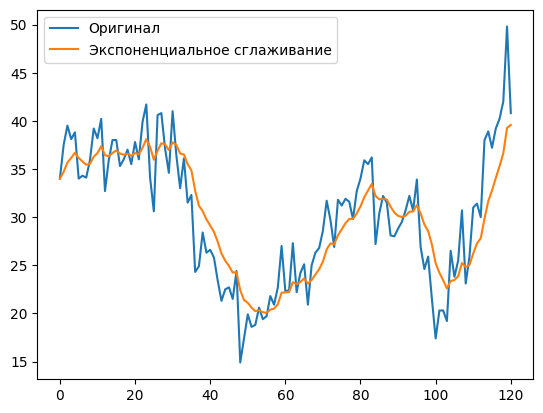

In [ ]:
# вычисление экспоненциального сглаживания
alpha = 0.2 # коэффициент сглаживания
exp_smooth = data['dan'].ewm(alpha=alpha, adjust=False).mean()

# построение графика
plt.plot(data['dan'], label='Оригинал')
plt.plot(exp_smooth, label='Экспоненциальное сглаживание')
plt.legend(loc='best')
plt.show()

# аналитические выводы
# Экспоненциальное сглаживание позволяет сгладить временной ряд, уменьшив шумы и выбросы. 
# В данном случае использовался коэффициент сглаживания alpha=0.2, который можно настраивать в зависимости от конкретной задачи и свойств данных.

Экспоненциальное сглаживание позволяет сгладить временной ряд, уменьшив шумы и выбросы. 
В данном случае использовался коэффициент сглаживания alpha=0.2, который можно настраивать в зависимости от конкретной задачи и свойств данных.

## ПРАВЫЙ СТОЛБЕЦ

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/16.2.xlsx', header=0, names=['num', 'dan'])

In [ ]:
from scipy.optimize import curve_fit
import numpy as np

In [ ]:
def func(x, a, b):
    return a * np.exp(b * x)

 #создать образец данных
xdata = np.array([1, 2, 3]) # периоды времени в прошлом
ydata = np.array([2, 5, 10]) #данные за соответствующие периоды времени

 #подогнать данные к функции
popt, pcov = curve_fit (func, xdata, ydata)

 #прогноз на 4 периода вперед
for i in range(4): # цикл по каждому периоду

    x = xdata[-1] + 1 + i # рассчитать новый период времени

    ypred = func(x ,*popt) # вычислить прогнозируемое значение в новый период времени

    print("Период:", x,"Прогнозируемое значение:", ypred)

    interval_low = ypred - 1.96*np.sqrt(pcov[0][0]) # вычислить нижнюю границу 95% доверительного интервала

    interval_high = ypred + 1,96*np.sqrt(pcov[0][0]) # вычислить верхнюю границу 95% доверительного интервала

    print("95% доверительный интервал: [",interval_low,"," ,interval_high,"]")

Период: 4 Прогнозируемое значение: 21.246262776578856
95% доверительный интервал: [ 20.89554934251504 , (22.246262776578856, 17.177800852105356) ]
Период: 5 Прогнозируемое значение: 44.885701882348286
95% доверительный интервал: [ 44.534988448284466 , (45.885701882348286, 17.177800852105356) ]
Период: 6 Прогнозируемое значение: 94.82732349954775
95% доверительный интервал: [ 94.47661006548392 , (95.82732349954775, 17.177800852105356) ]
Период: 7 Прогнозируемое значение: 200.3359846228485
95% доверительный интервал: [ 199.9852711887847 , (201.3359846228485, 17.177800852105356) ]


Для расчета интервального прогноза мы используем уровень значимости `alpha` (обычно равный 0.05), число степеней свободы `df` (равное разности между количеством наблюдений и количеством параметров в модели), критическое значение t-статистики `t_value`, оценку стандартного отклонения ошибки `sigma` и формулу для интервального прогноза на 4 периода вперед.

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [ ]:
# создание модели прогнозирования Брауна
model = SimpleExpSmoothing(df['dan'])

# подгонка модели к данным
fit = model.fit()

# расчет прогноза на 4 периода вперед
forecast = fit.forecast(4)

# вывод результатов
print('Прогноз на 4 периода вперед:', forecast)

Прогноз на 4 периода вперед: 96    607.527593
97    607.527593
98    607.527593
99    607.527593
dtype: float64


Модель прогнозирования Брауна основана на экспоненциальном сглаживании временных рядов и предполагает, что будущие значения ряда будут равны взвешенной сумме предыдущих значений, причем веса убывают экспоненциально с увеличением времени. Адаптивность модели заключается в том, что веса автоматически корректируются на основе ошибки прогнозирования.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

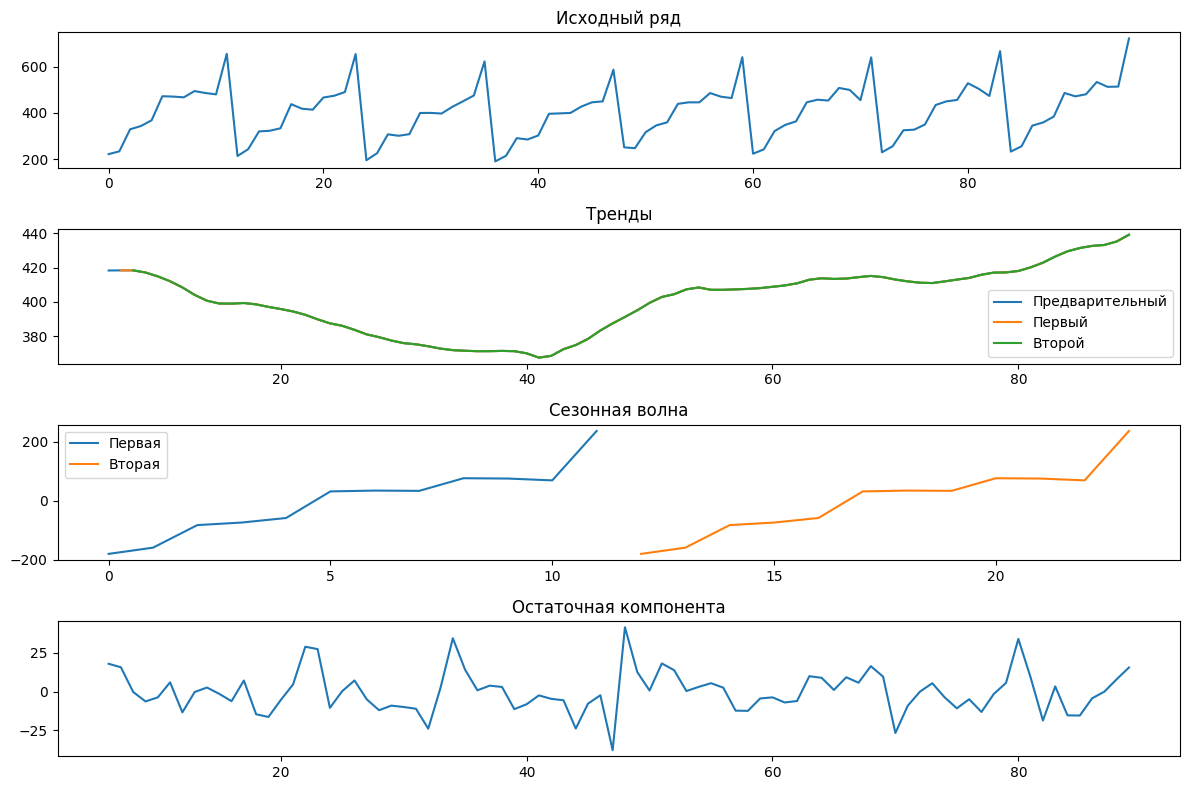

In [ ]:
# выделение компонент тренд-сезонного временного ряда методом Четверикова
result = seasonal_decompose(df['dan'], model='additive', period=12)

# построение диаграмм
plt.figure(figsize=(12, 8))

# исходный ряд
plt.subplot(411)
plt.plot(df['dan'])
plt.title('Исходный ряд')

# тренды: предварительный, первый и второй
plt.subplot(412)
plt.plot(result.trend)
plt.plot(result.trend.dropna().iloc[1:])
plt.plot(result.trend.dropna().iloc[2:])
plt.legend(['Предварительный', 'Первый', 'Второй'])
plt.title('Тренды')

# сезонная волна: первая и вторая
plt.subplot(413)
plt.plot(result.seasonal[:12])
plt.plot(result.seasonal[12:24])
plt.legend(['Первая', 'Вторая'])
plt.title('Сезонная волна')

# остаточная компонента
plt.subplot(414)
plt.plot(result.resid)
plt.title('Остаточная компонента')

plt.tight_layout()
plt.show()

Выделяем компоненты тренд-сезонного временного ряда методом Четверикова с помощью функции `seasonal_decompose`

Обратите внимание, что в функции `seasonal_decompose` мы указываем модель `'additive'`, так как предполагаем, что компоненты временного ряда складываются аддитивно, и период сезонности равен 12 (так как данные имеют годовую сезонность).